/var/folders/nl/k9vvzpz57vj2dcsjwk1pfq780000gp/T/ipykernel_84738/303683386.py:30: DeprecationWarning: You are passing weight=[1, 10, 1] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  b = signal.firls(numtaps, bands, desired, weights, fs=Fs)


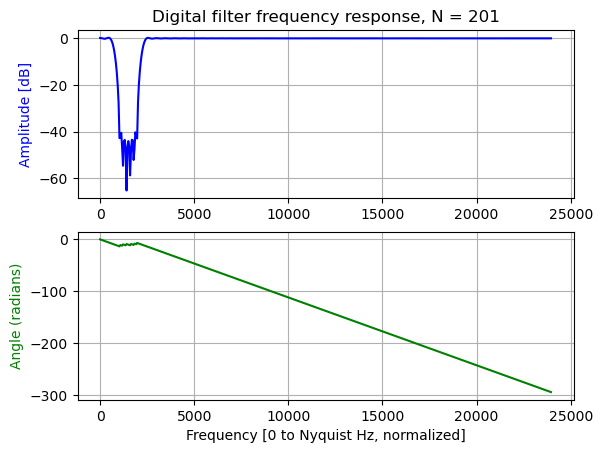

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Your filter design here
# firls() can be called via signal.firls()

#larger numtaps=longer FIR filter

#Question 1:
# Using a longer filter improves performance by providing a sharper transition band and better stopband attenuation.
#However, it also increases computational complexity and latency, relating to the uncertainty principle.

#Question 2: 
#With an order of 201, I observed that I could make transition bands up to 600Hz wide and still
#meet the specifications - frequencies between 1k and 2khz attenuated below -20dB and 
#all other frequencies passing through with approximately unity gain.
#If I make the left (<1000Hz-1000Hz) transition band wider than 600Hz, I notice frequencies below
#1000Hz start to be attenuated below 0dB. If I make the right transition band (>2000Hz-<nyq) wider than 600 Hz, 
#I notice frequencies above 2000Hz still attenuated below 0dB, and unity gain from ~3000Hz.
#If I make the right transition band wider than 1000Hz, I notice jumps in amplitude before frequencies start passing through with unity gain.

Fs = 48000
nyq = Fs / 2
numtaps = 201 
desired = [1,1,0,0,1,1]
weights = [1,10,1]

bands = [0, 600, 1000, 2000, 2400, nyq]
b = signal.firls(numtaps, bands, desired, weights, fs=Fs)

# Signal analysis
w, h = signal.freqz(b, fs=Fs)

plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
plt.plot(w, 20 * np.log10(abs(h)), 'b') #get rid of pi if setting fs in freqz
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()